In [ ]:
import sqlite3

conn = sqlite3.connect('search.db')
cur = conn.cursor()

cur.execute("SELECT * FROM data_lab")
c = cur.fetchall()

cur.close()
conn.close()

In [ ]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.DataFrame(c).drop(0, axis=1)
df.columns = ['section', 'date', 'ratio', 'div']
df

,section,date,ratio,div
0,device,2017-08-01,21.84437,mo
1,device,2017-08-01,4.29243,pc
2,device,2017-09-01,20.64386,mo
3,device,2017-09-01,3.40552,pc
4,device,2017-10-01,20.69776,mo
...,...,...,...,...
562,age,2022-10-01,1.04272,10
563,age,2022-10-01,12.75076,20
564,age,2022-10-01,31.06653,30
565,age,2022-10-01,44.69001,40


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year 
df['month'] = df['date'].dt.month 
df

,section,date,ratio,div,year,month
0,device,2017-08-01,21.84437,mo,2017,8
1,device,2017-08-01,4.29243,pc,2017,8
2,device,2017-09-01,20.64386,mo,2017,9
3,device,2017-09-01,3.40552,pc,2017,9
4,device,2017-10-01,20.69776,mo,2017,10
...,...,...,...,...,...,...
562,age,2022-10-01,1.04272,10,2022,10
563,age,2022-10-01,12.75076,20,2022,10
564,age,2022-10-01,31.06653,30,2022,10
565,age,2022-10-01,44.69001,40,2022,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   section  567 non-null    object        
 1   date     567 non-null    datetime64[ns]
 2   ratio    567 non-null    float64       
 3   div      567 non-null    object        
 4   year     567 non-null    int64         
 5   month    567 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 26.7+ KB


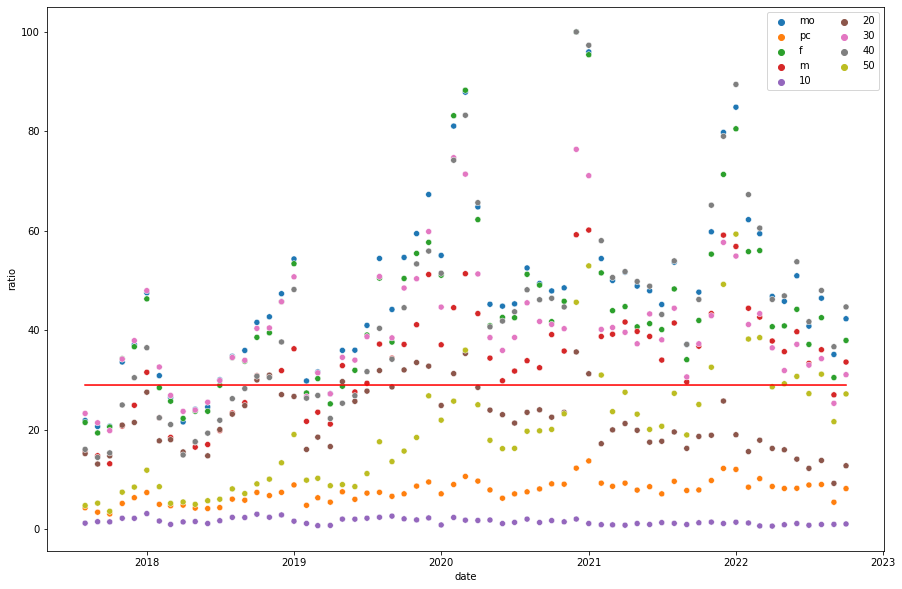

In [ ]:
plt.figure(figsize=(15,10))
predict = df['ratio'].mean()
sns.lineplot(x=df['date'], y=predict, color='red')

sns.scatterplot(x='date', y='ratio', hue='div', data= df)
plt.legend(ncol=2)
plt.show();

In [ ]:
target = 'ratio'
features = ['year','month']

X = df[features]
y = df[target]

print(X.shape)
print(y.shape)

(567, 2)
(567,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((453, 2), (114, 2), (453,), (114,))

In [ ]:
# Modeling algorithms
import statsmodels.api as sm

fit_df = sm.OLS(y_train, X_train).fit() #회귀분석 계산
display(fit_df.summary()) #통계량 정리
pred_tr = fit_df.predict(X_train).values
pred_te = fit_df.predict(X_test).values

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ratio   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.656
Method:                 Least Squares   F-statistic:                              432.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                   1.19e-105
Time:                        16:59:22   Log-Likelihood:                         -2010.1
No. Observations:                 453   AIC:                                      4024.
Df Residuals:                     451   BIC:                                      4032.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0139      0.001     13.266      0.000       0.012       0.016
month          0.0376      0.286      0.132      0.895      -0.525       0.600
==============================================================================
Omnibus:                       39.386   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.507
Skew:                           0.738   Prob(JB):                     4.83e-11
Kurtosis:                       3.581   Cond. No.                         600.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred_date = []
pred_ratio = []

for y in range(2023,2025):
  for m in range(1,13):
    extrapolate_x_m = [[y, m]]
    extrapolate_y_m = fit_df.predict(extrapolate_x_m)[0]  

    if m < 10:
      pred_date.append(f"{y}-0{m}-01")
      pred_ratio.append(extrapolate_y_m)
    else:
      pred_date.append(f"{y}-{m}-01")
      pred_ratio.append(extrapolate_y_m)

In [21]:
pred_df = pd.DataFrame({'date': pred_date,
                       'ratio': pred_ratio})
pred_df

,date,ratio
0,2023-01-01,28.179071
1,2023-02-01,28.216711
2,2023-03-01,28.254351
3,2023-04-01,28.291991
4,2023-05-01,28.329632
5,2023-06-01,28.367272
6,2023-07-01,28.404912
7,2023-08-01,28.442552
8,2023-09-01,28.480192
9,2023-10-01,28.517832


In [ ]:
import os

os.chdir('./')
pred_df.to_csv('predict.csv')

In [22]:
import datetime

conn = sqlite3.connect('predict.db')
cur = conn.cursor()

create_table_predict = """CREATE TABLE predict(
                                                ID INTEGER NOT NULL PRIMARY KEY,
                                                PRED_DATE DATE,
                                                PRED_RATIO FLOAT
                                                )"""

cur.execute("DROP TABLE IF EXISTS predict")
cur.execute(create_table_predict)
conn.commit()

for i in range(24):
  cur.execute("INSERT INTO predict (PRED_DATE, PRED_RATIO) VALUES (?,?)", (pred_date[i],pred_ratio[i]))
  conn.commit()

cur.close()
conn.close()